<a href="https://colab.research.google.com/github/hariPrasadCoder/Analysis-of-Forbes-Billionaires/blob/main/Forbes_Billionaires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS OF FORBES BILLIONAIRES:

## [Click here](https://towardsdatascience.com/what-does-it-take-to-become-a-billionaire-d875be838781) to read my interpretations about this project as a blog.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('forbes_billionaires.csv')
df.head(10)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",True
6,Larry Ellison,93.0,United States,software,7,76.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",True
7,Larry Page,91.5,United States,Google,8,48.0,"Palo Alto, California",United States,Married,1.0,"Master of Science, Stanford University; Bachel...",True
8,Sergey Brin,89.0,United States,Google,9,47.0,"Los Altos, California",United States,Married,3.0,"Master of Science, Stanford University; Bachel...",True
9,Mukesh Ambani,84.5,India,diversified,10,64.0,"Mumbai, India",India,Married,3.0,"Drop Out, Stanford University; Bachelor of Sci...",False


In [11]:
df.describe()

,NetWorth,Rank,Age,Children
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


In [12]:
source = df['Source'].value_counts().head(10)

## 1. Which sector has the most number of billionaires?

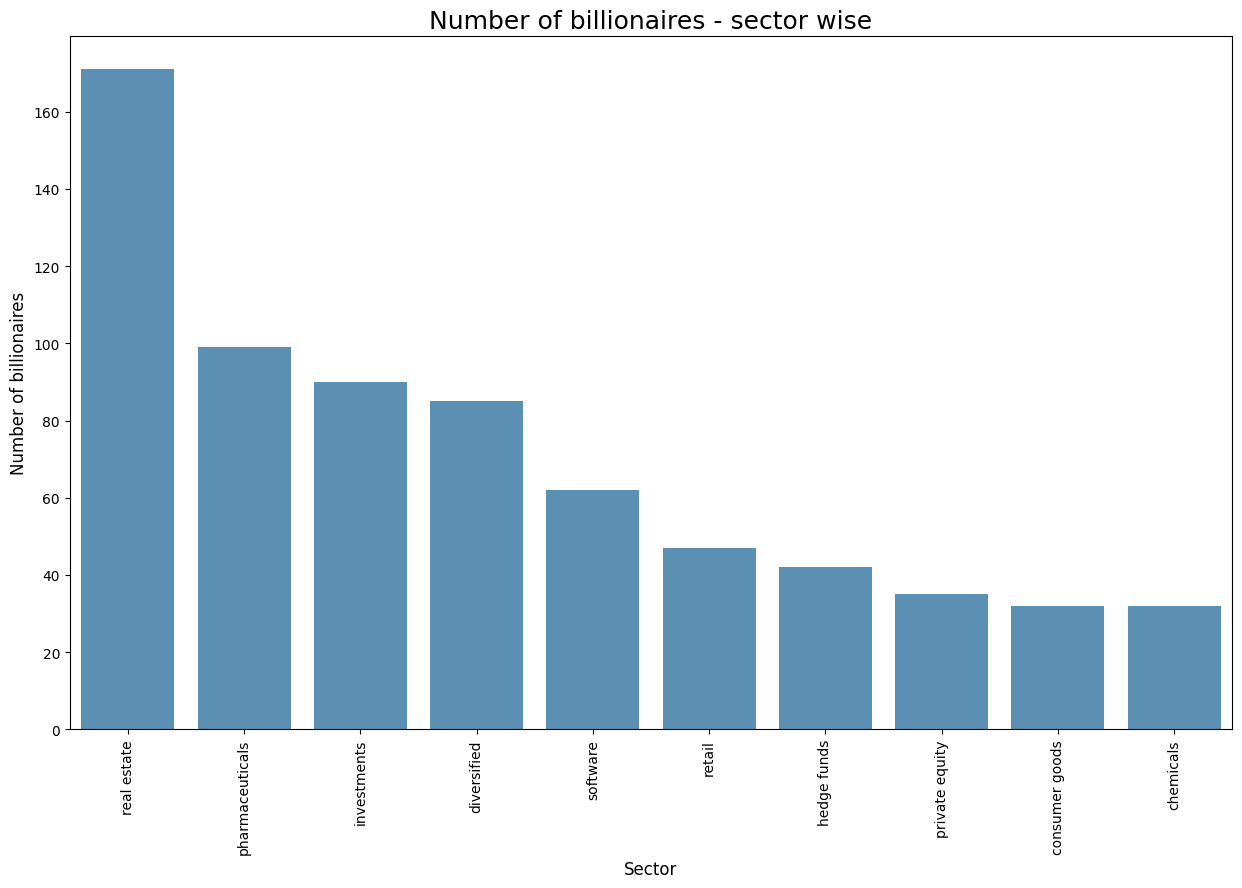

In [13]:
plt.figure(figsize=(15,9))
sns.barplot(x=source.index, y=source.values, alpha=0.8)
plt.title('Number of billionaires - sector wise', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.xticks(rotation=90)  # Optional: To rotate the x-axis labels if they are long
plt.show()


## 2. Does a college degree required to become a billionaire?

In [14]:
df['Education'] = df['Education'].fillna('empty')
master = 0
bachelor = 0
phd = 0
drop_out = 0
others = 0
unknown = 0
for i in df['Education']:
  if 'Ph.D' in i or 'Doctorate' in i:
    phd += 1
  elif 'Master' in i or 'MBA' in i:
    master += 1
  elif 'Bachelor' in i:
    bachelor += 1
  elif 'Drop Out' in i:
    drop_out += 1
  elif i == 'empty':
    unknown += 1
  else:
    others += 1

bachelor_percent = bachelor/(bachelor+master+phd+drop_out+others)*100
master_percent = master/(bachelor+master+phd+drop_out+others)*100
phd_percent = phd/(bachelor+master+phd+drop_out+others)*100
dropout_percent = drop_out/(bachelor+master+phd+drop_out+others)*100
others_percent = others/(bachelor+master+phd+drop_out+others)*100

print(f'Around {round(bachelor_percent)}% of the billionaires have only done bachelors degree')
print(f'Around {round(master_percent)}% of the billionaires have done masters degree')
print(f'Around {round(phd_percent)}% of the billionaires have done PHD degree')
print(f'Around {round(dropout_percent)}% of the billionaires have dropped out of the college')


Around 47% of the billionaires have only done bachelors degree
Around 33% of the billionaires have done masters degree
Around 7% of the billionaires have done PHD degree
Around 5% of the billionaires have dropped out of the college


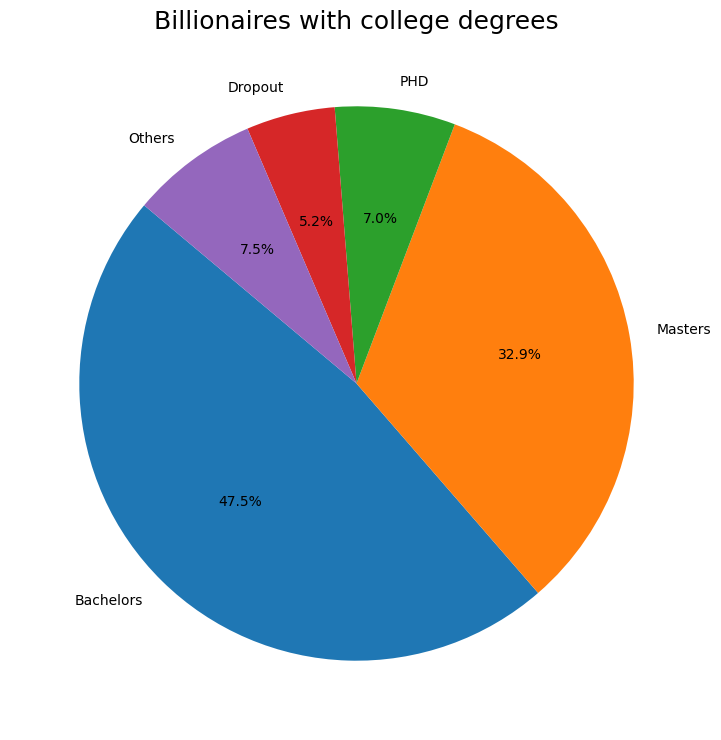

In [15]:
labels = ['Bachelors', 'Masters', 'PHD', 'Dropout', 'Others']
sizes = [bachelor_percent, master_percent, phd_percent, dropout_percent, others_percent]
plt.figure(figsize=(15,9))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Billionaires with college degrees', fontsize=18)
plt.show()

## 3. Where to study to become a billionaire?

In [16]:
# Initialize dictionaries
final_bachelor = {}
final_master = {}

# Loop through the Education column
for i in df['Education']:
    # Ensure the value is a string (skip if not)
    if isinstance(i, str):
        j = i.split(';')
        # Bachelor handling
        if len(j) == 1 and 'Bachelor' in j[0]:
            new = j[0].split(',')
            if new[-1] in final_bachelor:
                final_bachelor[new[-1]] += 1
            else:
                final_bachelor[new[-1]] = 1
        # Master handling
        elif len(j) == 2:
            if 'Master' in j[0]:
                new = j[0].split(',')
                if new[-1] in final_master:
                    final_master[new[-1]] += 1
                else:
                    final_master[new[-1]] = 1
            elif 'Master' in j[1]:
                new = j[1].split(',')
                if new[-1] in final_master:
                    final_master[new[-1]] += 1
                else:
                    final_master[new[-1]] = 1
    else:
        # Optionally, handle cases where the value is not a string
        # For example, you could print a message or skip it silently
        continue

# Sort and get top 10 universities for both Bachelor's and Master's
sort_bachelor = dict(sorted(final_bachelor.items(), key=lambda x: x[1], reverse=True)[:10])
sort_master = dict(sorted(final_master.items(), key=lambda x: x[1], reverse=True)[:10])

# Print the results
print('No. of billionaires who have done Bachelors at:', sort_bachelor)
print('No. of billionaires who have done Masters at:', sort_master)


No. of billionaires who have done Bachelors at: {' Stanford University': 18, ' Harvard University': 13, ' The Wharton School': 9, ' Yale University': 9, ' University of Southern California': 9, ' Bombay University': 7, ' University of Washington': 6, ' Delhi University': 6, ' Cornell University': 6, ' Sichuan University': 5}
No. of billionaires who have done Masters at: {' Harvard Business School': 22, ' Harvard University': 22, ' Stanford Graduate School of Business': 16, ' Stanford University': 13, ' Columbia Business School': 11, ' The Wharton School': 8, ' Massachusetts Institute of Technology': 7, ' Columbia University': 6, ' Leonard N. Stern School of Business': 6, ' Tsinghua University': 4}


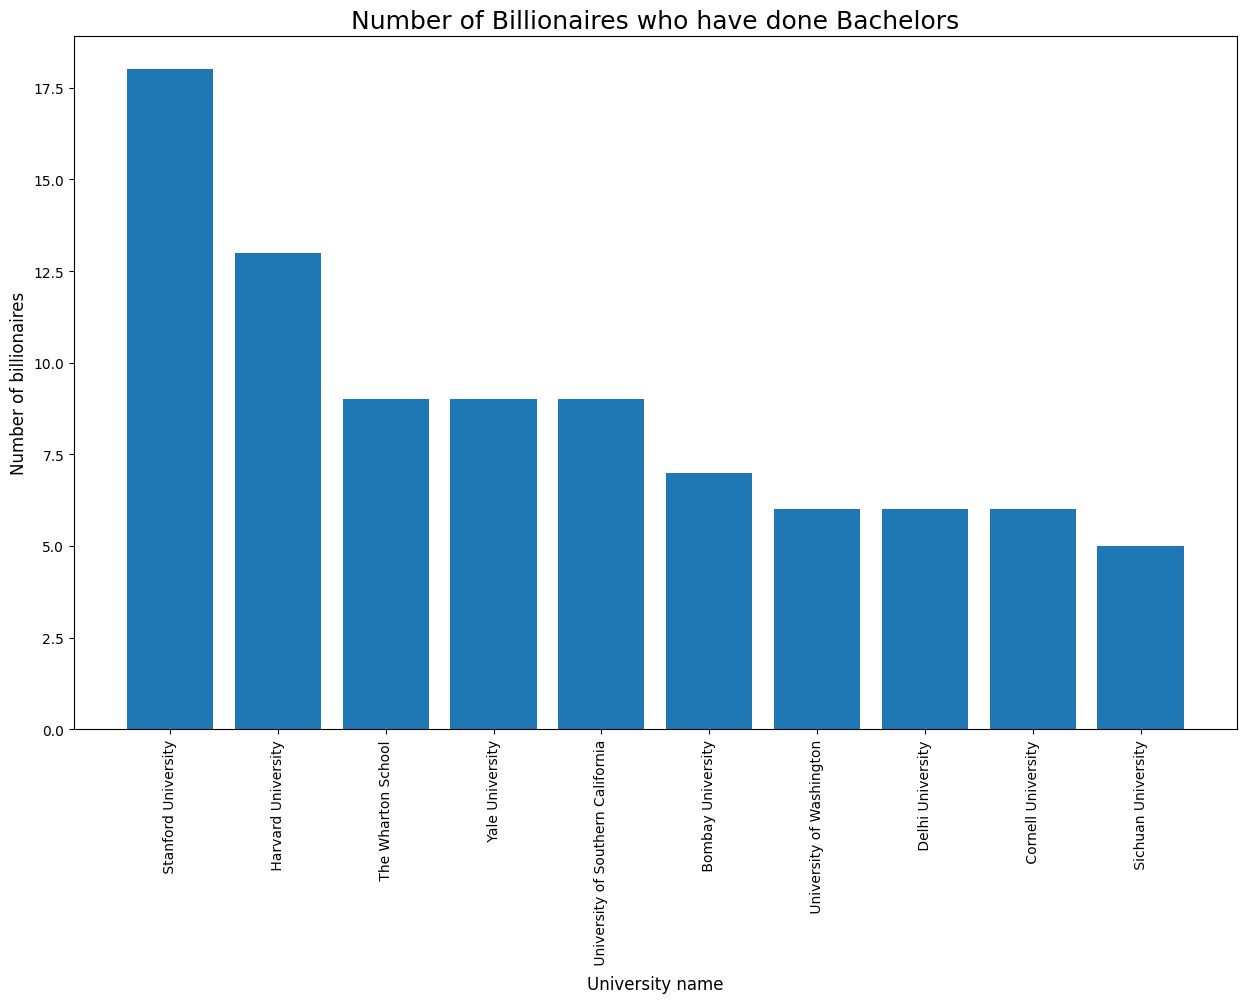

In [17]:
plt.figure(figsize=(15,9))
plt.bar(*zip(*sort_bachelor.items()))
plt.title('Number of Billionaires who have done Bachelors', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

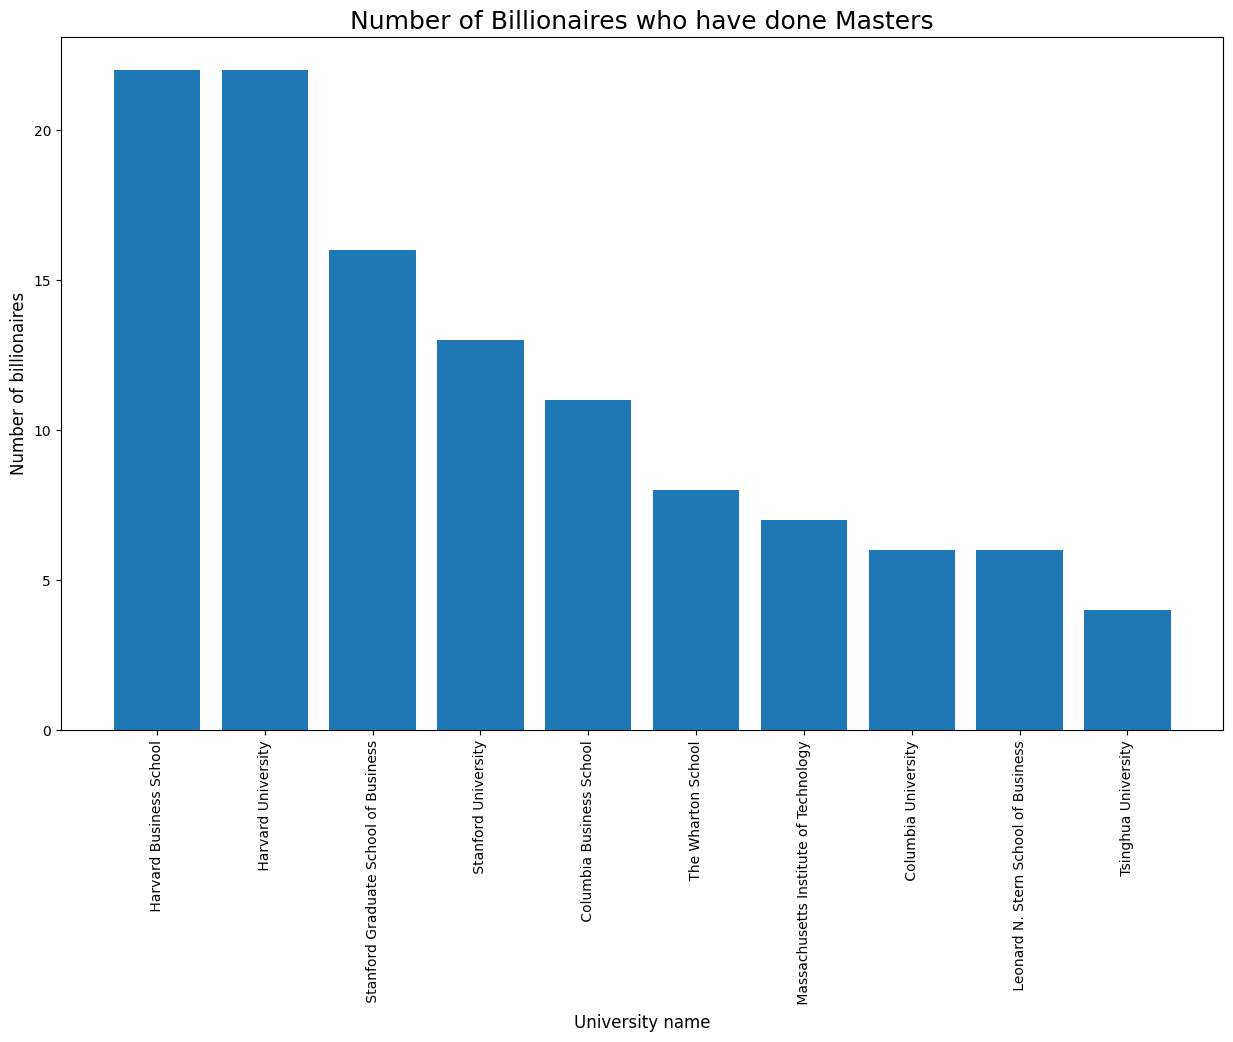

In [18]:
plt.figure(figsize=(15,9))
plt.bar(*zip(*sort_master.items()))
plt.title('Number of Billionaires who have done Masters', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('University name', fontsize=12)
plt.xticks(rotation=90)
plt.show()

## 4. Number of Billionaries - Age wise:

In [6]:
age = {'n0s':0, '10s':0, '20s':0, '30s':0, '40s':0, '50s':0, '60s':0, '70s':0, '80s':0, '90s':0, 'above':0}
for i in df['Age']:
  age[str(i)[0] + '0s'] += 1

for k,v in age.items():
  if k == 'n0s' or k == 'above':
    pass
  else:
    print(f'Number of billionaires who are in their {k}:',v)

NameError: name 'df' is not defined

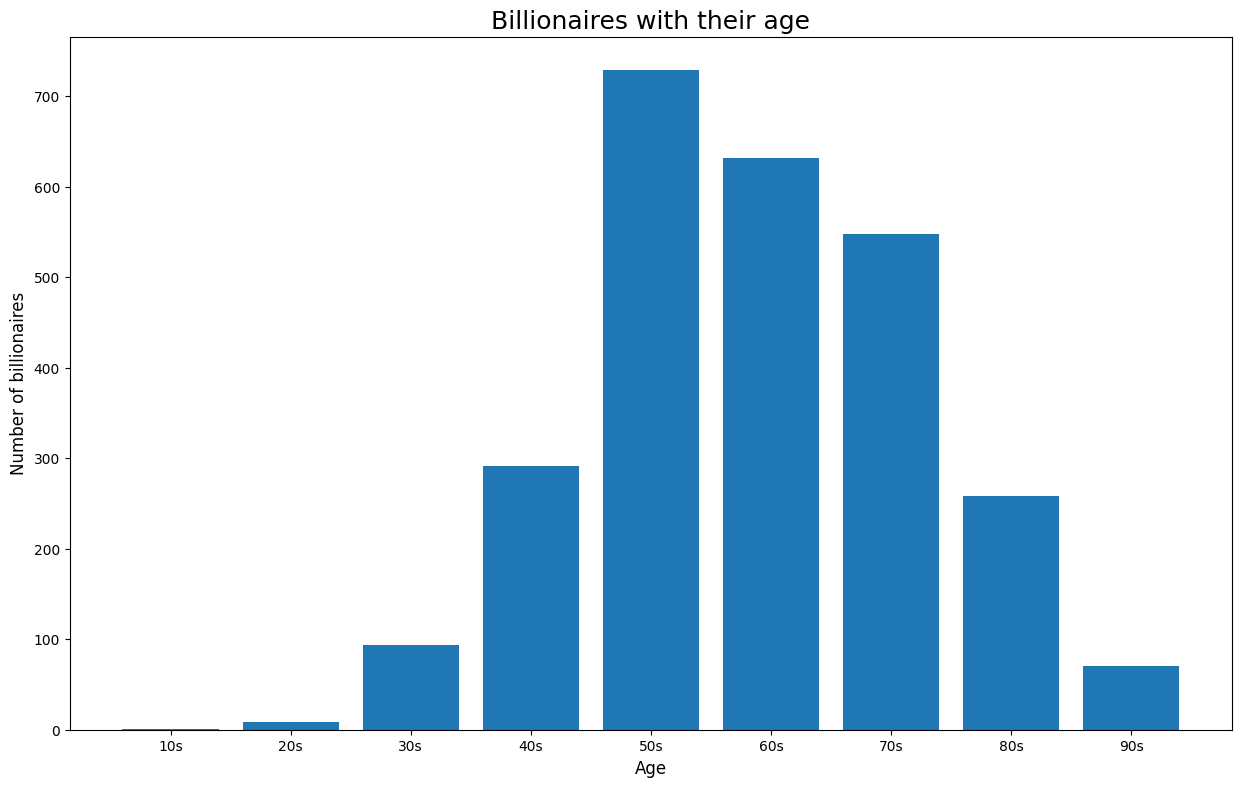

In [29]:
age1 = age
del age1['n0s']
del age1['above']

plt.figure(figsize=(15,9))
plt.bar(*zip(*age1.items()))
plt.title('Billionaires with their age', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

## 5. Number of Self made billionaries:

In [13]:
print("Number of billionaires who are self made: ",df['Self_made'].sum())
print("Number of billionaires who are not self made: ",len(df['Self_made']) - df['Self_made'].sum())

Number of billionaires who are self made:  1960
Number of billionaires who are not self made:  795


Text(0.5, 1.0, 'Self-made vs Non self-made billionaires')

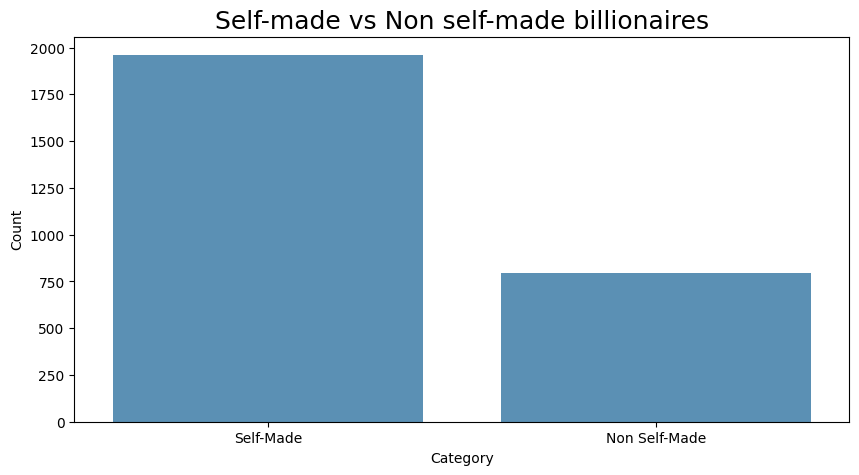

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of self-made and non-self-made billionaires
self_made_count = df['Self_made'].sum()
non_self_made_count = len(df['Self_made']) - self_made_count

# Create a DataFrame for plotting
self_made_df = pd.DataFrame({
    'Category': ['Self-Made', 'Non Self-Made'],
    'Count': [self_made_count, non_self_made_count]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Count', data=self_made_df, alpha=0.8)  # Use explicit arguments
plt.title('Self-made vs Non self-made billionaires', fontsize=18)


## 6. Where do younger billionaires live?

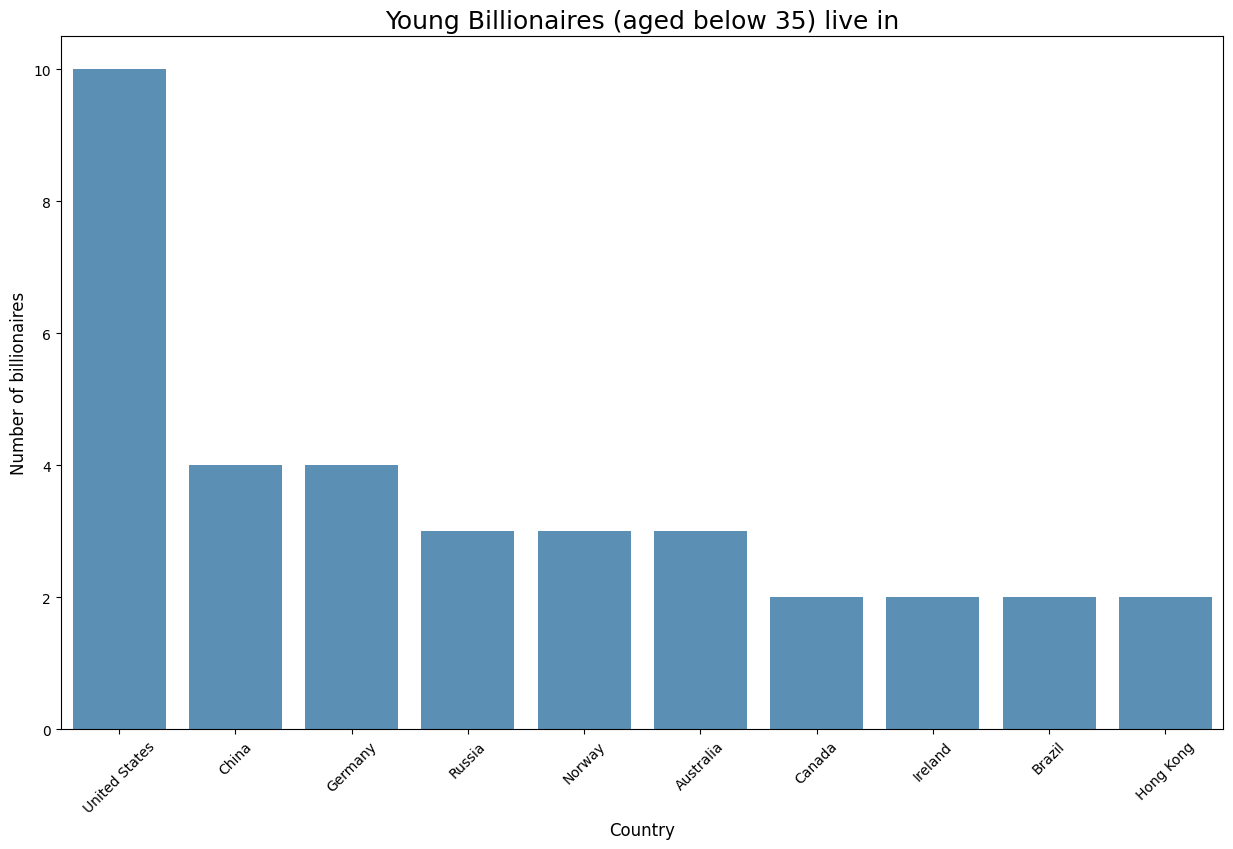

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt

df1 = df[df['Age'] <= 35]  # Filter billionaires aged 35 or younger
young = df1['Country'].value_counts().head(10)  # Get the top 10 countries

plt.figure(figsize=(15, 9))
sns.barplot(x=young.index, y=young.values, alpha=0.8)  # Explicitly define x and y
plt.title('Young Billionaires (aged below 35) live in', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


## 7. Number of billionaires in each relationship category

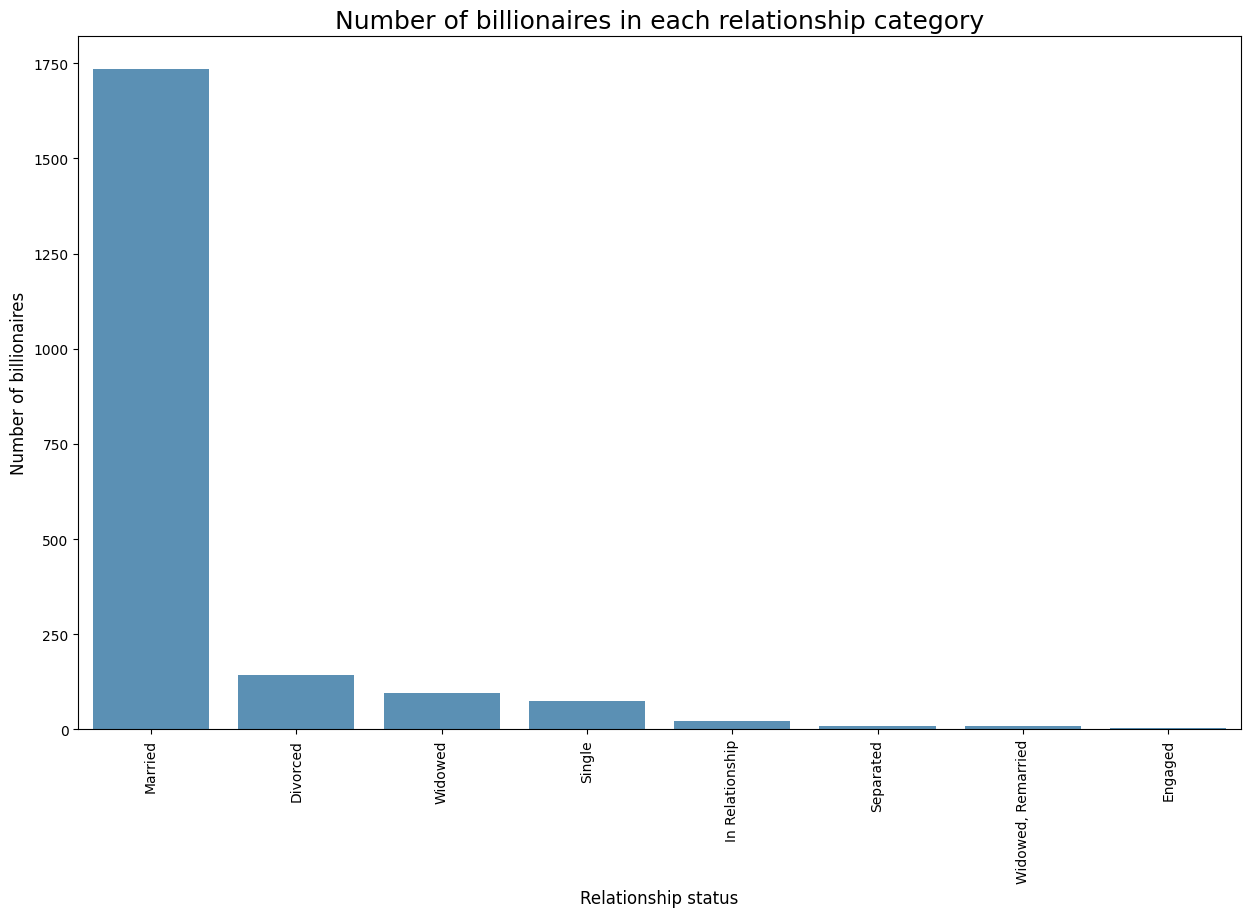

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

status = df['Status'].value_counts()

plt.figure(figsize=(15, 9))
sns.barplot(x=status.index, y=status.values, alpha=0.8)  # Explicitly specify x and y
plt.title('Number of billionaires in each relationship category', fontsize=18)
plt.ylabel('Number of billionaires', fontsize=12)
plt.xlabel('Relationship status', fontsize=12)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


## 8. How many billions are contributed by the billionaires to the country?

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

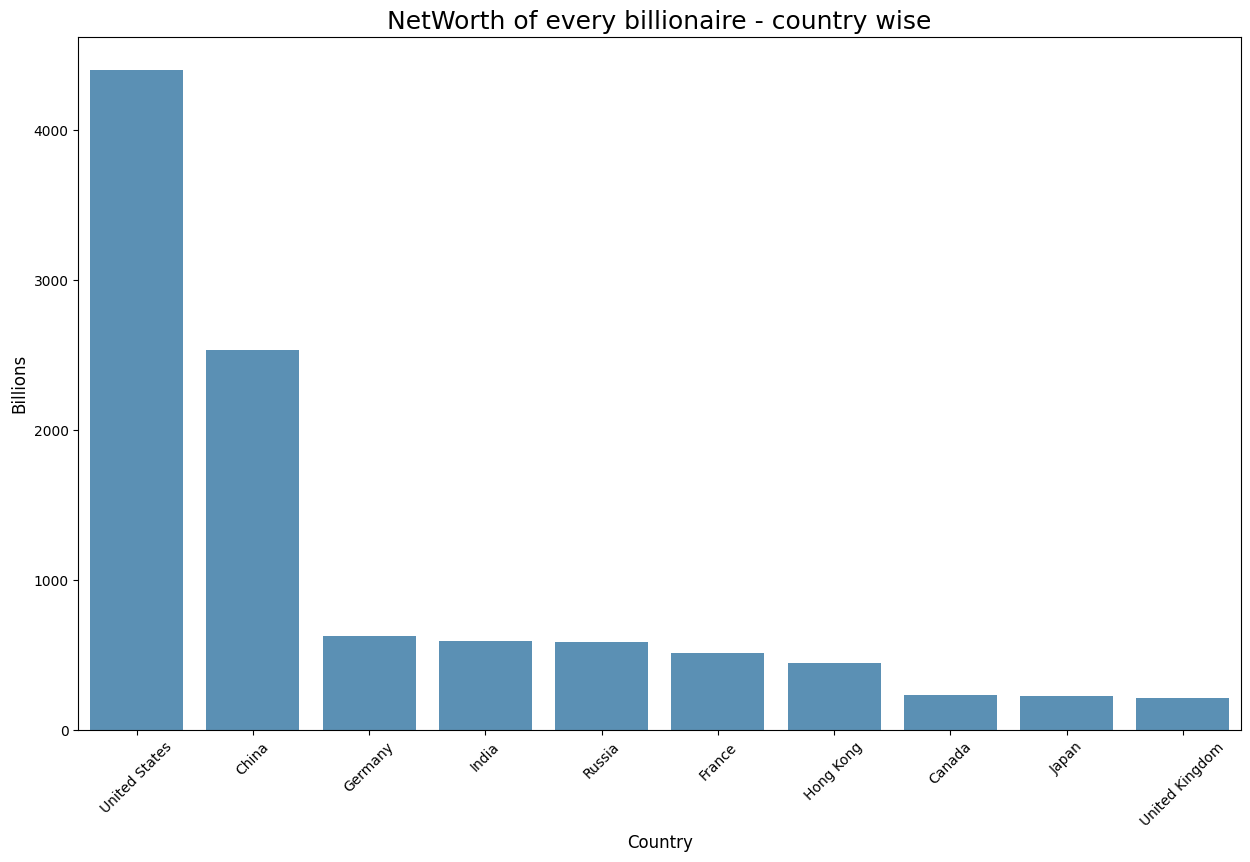

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

contributed = df.groupby('Country')['NetWorth'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 9))
sns.barplot(x=contributed.index, y=contributed.values, alpha=0.8)  # Explicitly specify x and y
plt.title('NetWorth of every billionaire - country wise', fontsize=18)
plt.ylabel('Billions', fontsize=12)
plt.xlabel('Country', fontsize=12)  # Add x-axis label for clarity
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## 9. Which city contains more billionaires?

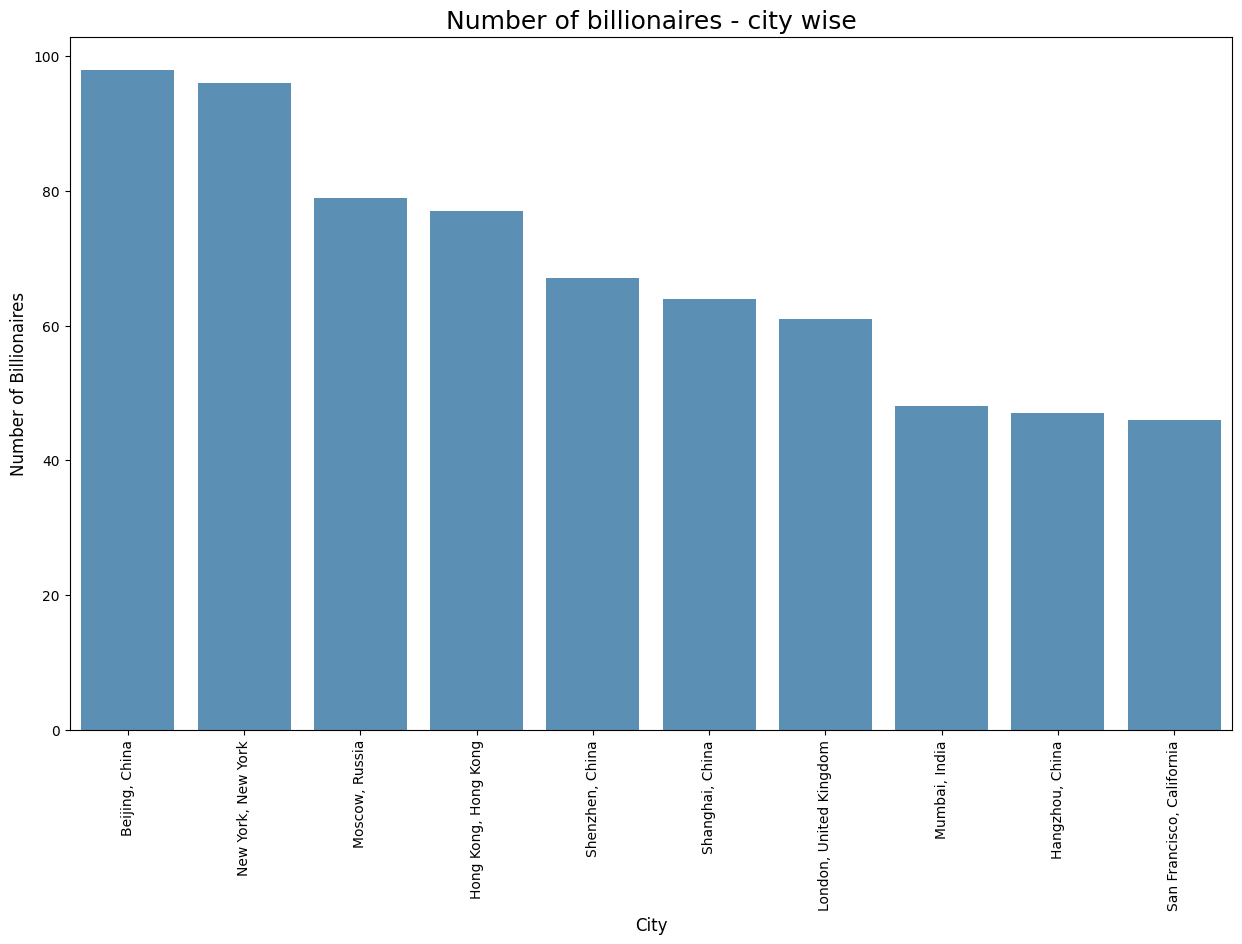

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

city = df['Residence'].value_counts().head(10)

plt.figure(figsize=(15, 9))
sns.barplot(x=city.index, y=city.values, alpha=0.8)  # Explicitly specify x and y
plt.title('Number of billionaires - city wise', fontsize=18)
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


## 10. How many billionaire families are there?

In [24]:
family = 0
for i in df['Name']:
  j = i.split()
  if j[-1] == 'family':
    family += 1
print('Number of billionaire families: ', family)

Number of billionaire families:  335


In [22]:


# Step 1: Preprocessing (handle missing values, encode categorical variables, and scale features)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder




In [26]:
import pandas as pd

# Load the dataset
X = pd.read_csv('forbes_billionaires.csv')

# Separate the target variable (NetWorth) from the features (X)
y = X.pop('NetWorth')

# Define categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns  # Categorical columns (strings)
num_cols = X.select_dtypes(exclude=['object']).columns  # Numerical columns

# Convert boolean columns in the dataset to string if any
X[cat_cols] = X[cat_cols].applymap(str)  # Convert all boolean values to strings in categorical columns

# Verify the transformation (optional)
print(X.head())

                       Name        Country         Source  Rank   Age  \
0                Jeff Bezos  United States         Amazon     1  57.0   
1                 Elon Musk  United States  Tesla, SpaceX     2  49.0   
2  Bernard Arnault & family         France           LVMH     3  72.0   
3                Bill Gates  United States      Microsoft     4  65.0   
4           Mark Zuckerberg  United States       Facebook     5  36.0   

               Residence    Citizenship           Status  Children  \
0    Seattle, Washington  United States  In Relationship       4.0   
1          Austin, Texas  United States  In Relationship       7.0   
2          Paris, France         France          Married       5.0   
3     Medina, Washington  United States         Divorced       3.0   
4  Palo Alto, California  United States          Married       2.0   

                                           Education Self_made  
0     Bachelor of Arts/Science, Princeton University      True  
1  Bachelo

/var/folders/mk/f72_g0750hn8mtgtshyrvpz80000gn/T/ipykernel_24562/2198141340.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X[cat_cols] = X[cat_cols].applymap(str)  # Convert all boolean values to strings in categorical columns


In [27]:


# Create a preprocessing pipeline for categorical and numerical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing numerical values
    ('scaler', StandardScaler())  # Scale numerical features
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding for categorical features
])

# Combine both transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Initialize models with preprocessing
lr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
dt = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor())])
rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Rank', 'Age', 'Children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Name', 'Country', 'Source', 'Residence', 'Citizenship', 'Status',
       'Education', 'Self_made'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [30]:
# Step 4: Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))

print("\nDecision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2:", r2_score(y_test, y_pred_dt))

print("\nRandom Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))



Linear Regression:
MAE: 3.4470653601048036
MSE: 35.57515788942848
R2: -0.20536607918860073

Decision Tree Regressor:
MAE: 0.026860254083485177
MSE: 0.0376043557168784
R2: 0.9987258801506448

Random Forest Regressor:
MAE: 0.013729582577134277
MSE: 0.011729784029037689
R2: 0.9996025686286831


In [31]:
# Step 5: Model Selection (based on performance metrics)
# Compare R2 scores and choose the best model (for example, Random Forest)
best_model = rf



In [32]:
# Step 6: Optimization (Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV

# Set hyperparameters for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}



In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a smaller parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Number of trees
    'regressor__max_depth': [5, 10, 20, None],  # Tree depth
    'regressor__min_samples_split': [2, 5, 10],  # Min samples to split
    'regressor__min_samples_leaf': [1, 2, 4],  # Min samples per leaf
}

# Use RandomizedSearchCV to explore 20 random combinations
random_search = RandomizedSearchCV(
    rf,  # Random Forest Pipeline
    param_distributions=param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Show progress
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # For reproducibility
)

# Fit the model on a subset of data (optional, if dataset is large)
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)
random_search.fit(X_sample, y_sample)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)




Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END regressor__max_depth=5, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=5, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=5, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=5, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=5, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   0.3s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor__min_samples_split=5, regressor__n_estimators=200; total time=   0.7s
[CV] END regressor__max_depth=20, regressor__min_samples_leaf=4, regressor